In [29]:
import os

import networkx as nx
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt

datapath = "../data"
localdatapath = "../local_data"

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["figure.dpi"]  = 100

Load book dataset (requires that you have the books locally in `chapters.csv`)

In [30]:
df = pd.read_csv(os.path.join(localdatapath, "chapters.csv"), header=0, index_col=0)
df["names"] = df.apply(lambda r: eval(r["names"]), axis=1)
df.head(10)

,book,title,text,names
0,0,PROLOGUE,"PROLOGUE\n\n\n\n“We should start back,” Gared ...","[Jon Snow, Jon Snow, Jon Snow, Jon Snow]"
1,0,BRAN,BRAN\n\n\n\n\n\nThe morning had dawned clear a...,"[Brandon 'Bran' Stark, Brandon 'Bran' Stark, R..."
2,0,CATELYN,CATELYN\n\n\n\n\n\nCatelyn had never liked thi...,"[Catelyn Stark, Catelyn Stark, Catelyn Stark, ..."
3,0,DAENERYS,DAENERYS\n\n\n\n\n\nHer brother held the gown ...,"[Daenerys Targaryen, Daenerys Targaryen, Viser..."
4,0,EDDARD,EDDARD\n\n\n\n\n\nThe visitors poured through ...,"[Eddard 'Ned' Stark, Eddard 'Ned' Stark, Jaime..."
5,0,JON,"JON\n\n\n\n\n\nThere were times—not many, but ...","[Jon Snow, Jon Snow, Jon Snow, Jon Snow, Jon S..."
6,0,CATELYN,CATELYN\n\n\n\n\n\nOf all the rooms in Winterf...,"[Catelyn Stark, Eddard 'Ned' Stark, Eddard 'Ne..."
7,0,ARYA,ARYA\n\n\n\n\n\nArya’s stitches were crooked a...,"[Arya Stark, Sansa Stark, Catelyn Stark, Arya ..."
8,0,BRAN,BRAN\n\n\n\n\n\nThe hunt left at dawn. The kin...,"[Brandon 'Bran' Stark, Joffrey Baratheon, Robb..."
9,0,TYRION,TYRION\n\n\n\n\n\nSomewhere in the great stone...,"[Tyrion Lannister, Tyrion Lannister, Tyrion La..."


Summary statistics about book chapters

In [31]:
print(f"""
Number of chapters: {len(df)}
Number of words:    {sum(len(c.split()) for c in df.text)}
Number of letters:  {sum(len(c) for c in df.text)}
""")


Number of chapters: 358
Number of words:    1741449
Number of letters:  9419747



Load book graph built by `graphing.py`

In [40]:
G_book = nx.read_gpickle(os.path.join(datapath, "book_char_graph.nxgraph"))

In [41]:
print(
f"""
Book character graph:
Nodes: {len(G_book.nodes())}
Edges: {len(G_book.edges())}
""" 
)


Book character graph:
Nodes: 34
Edges: 505



In [45]:
G_reddit = nx.read_gpickle(os.path.join(datapath, "asoiaf_graph.nxgraph"))

In [46]:
print(
f"""
Reddit character graph:
Nodes: {len(G_reddit.nodes())}
Edges: {len(G_reddit.edges())}
""" 
)


Reddit character graph:
Nodes: 34
Edges: 561



In [47]:
def plot_graph(G: nx.Graph, weight_cutoff: int = 100, max_node_size: int = 400):
    H = G.copy() # H is G, just mutated for plotting

    H.remove_edges_from([e for e, w in nx.get_edge_attributes(H,'weight').items() if w < weight_cutoff] )
    edge_sizes = list(nx.get_edge_attributes(H,'weight').values())
    max_edge_size = max(edge_sizes)
    edge_sizes = [w/max_edge_size for w in edge_sizes]


    H.remove_nodes_from(list(nx.isolates(H)))
    max_deg = max(d for _, d in H.degree()) 
    node_sizes = list((d/max_deg)**3 * max_node_size for _, d in H.degree()) # Scale polynomially node size with number of connections
    
    pos = nx.drawing.layout.kamada_kawai_layout(H)
    fig, ax = plt.subplots(figsize=(20, 10))

    nx.draw_networkx_nodes(H, pos=pos, ax=ax, node_size=node_sizes, node_color="r")
    nx.draw_networkx_edges(H, pos=pos, ax=ax, edge_color=edge_sizes, edge_cmap=plt.cm.Oranges)
    nx.draw_networkx_labels(H, pos=pos, ax=ax, font_family="serif", font_size=10, horizontalalignment="center", verticalalignment="top")

    plt.show()

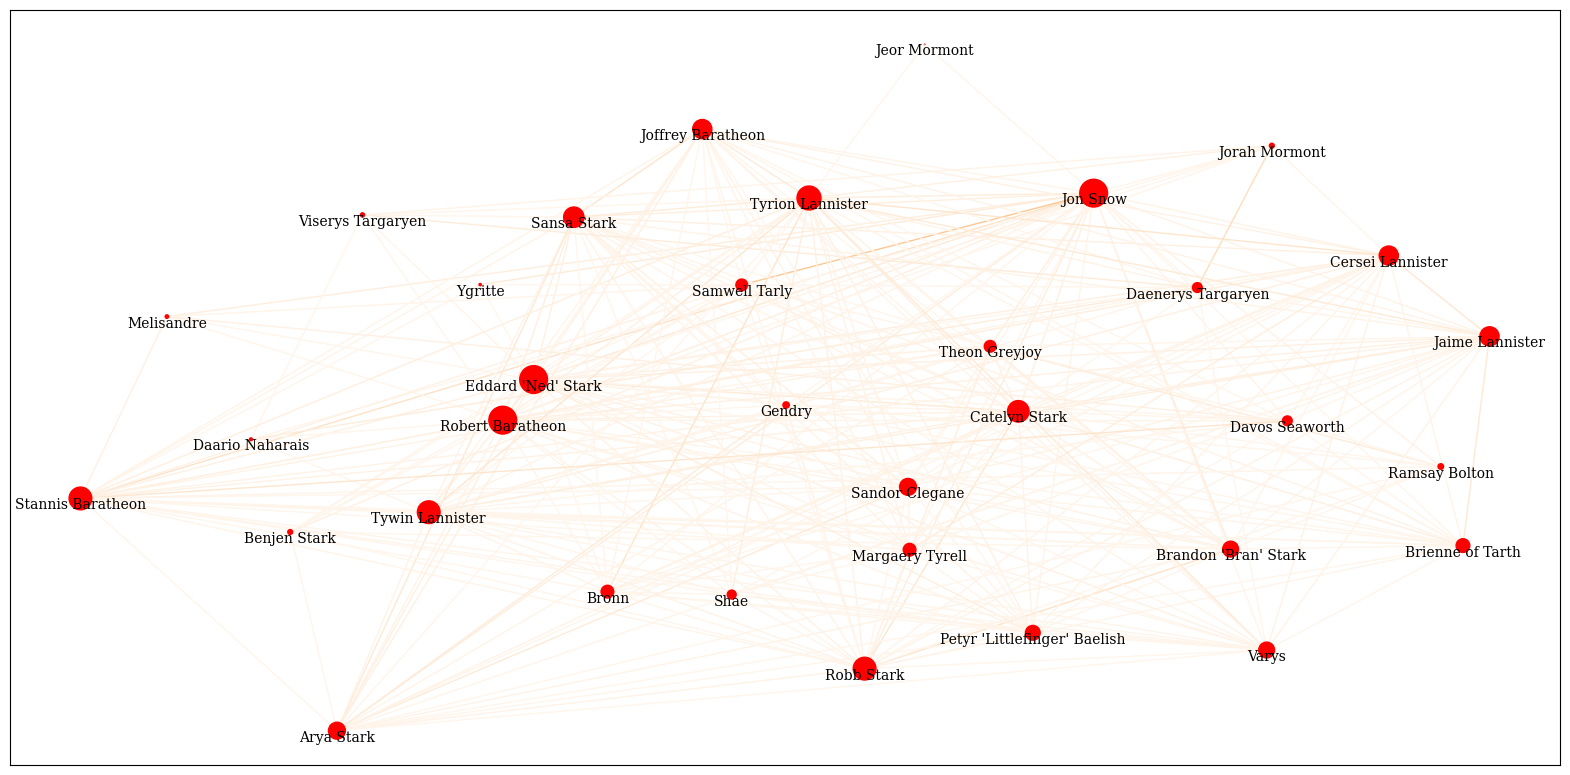

In [48]:
plot_graph(G_book)

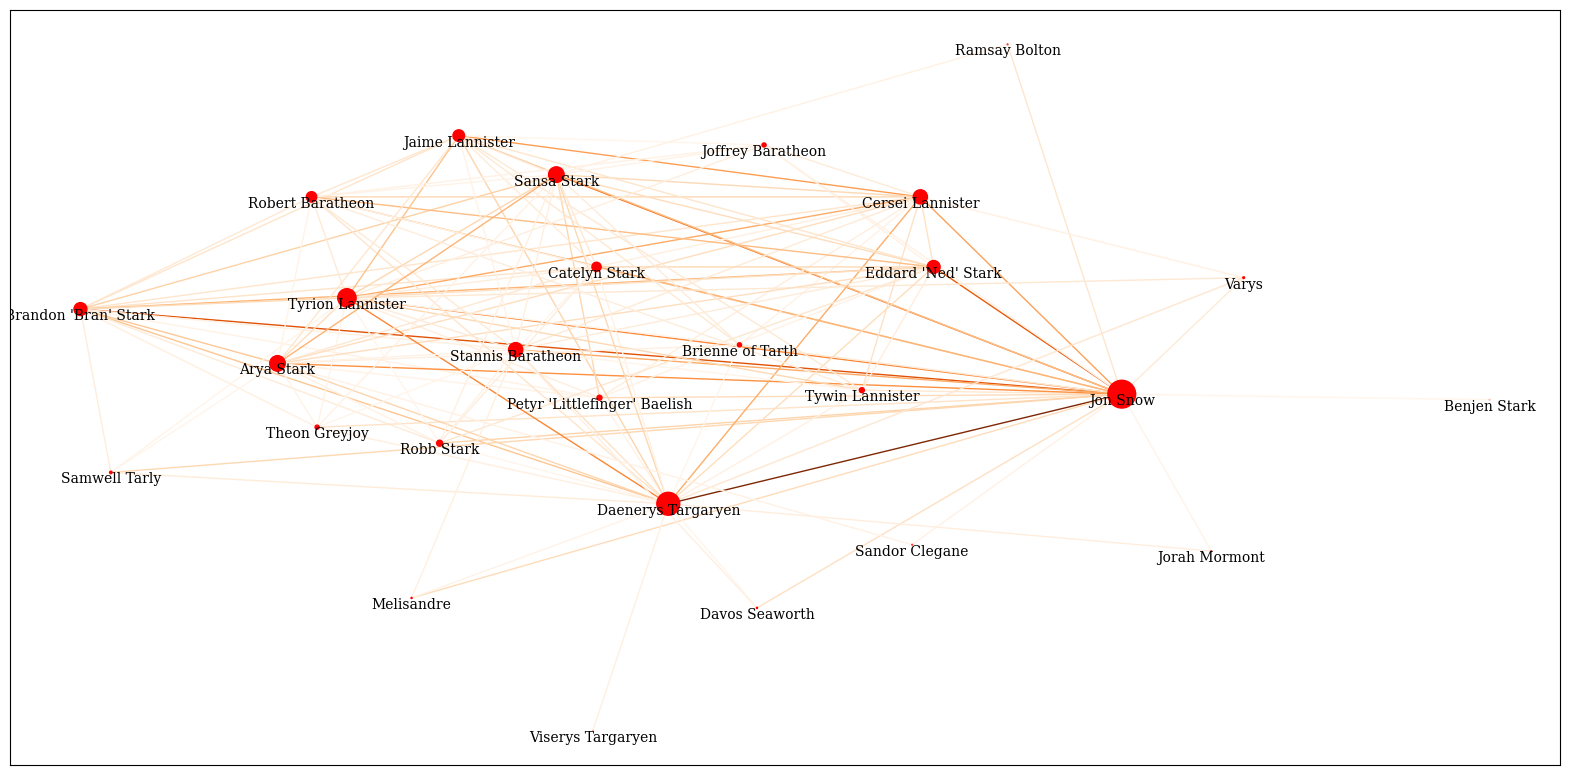

In [52]:
plot_graph(G_reddit, weight_cutoff=750)